# Data Visualisation

In this tutorial we'll visualise the signals in a MIMIC Waveform record.

Our **objectives** are to:
- Plot one minute of signals from a segment of data
- Look more closely at the shape of the PPG pulse waves

---
## Setup

<div class="alert alert-block alert-warning">
<p><b>Resource:</b> These steps are taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-exploration.html">Data Exploration</a> tutorial.</p>
</div>

- Specify the required Python packages

In [ ]:
import sys
from pathlib import Path

- Install and import the WFDB toolbox

In [1]:
!pip install wfdb==4.0.0
import wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 20.8 MB/s 


- Specify the settings for the MIMIC-IV database

In [2]:
# The name of the MIMIC IV Waveform Database on PhysioNet
database_name = 'mimic4wdb/0.1.0'

- Provide a list of segments which meet the requirements for the study (NB: these are copied from the end of the [Data Exploration Tutorial](https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-exploration.html)).

In [3]:
segment_names = ['83404654_0005', '82924339_0007']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654',
                'mimic4wdb/0.1.0/waves/p101/p10126957/82924339']

- Specify a segment from which to extract data

In [6]:
rel_segment_n = 1
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]
print(f"Specified segment '{rel_segment_name}' in directory: '{rel_segment_dir}'")

Specified segment '82924339_0007' in directory: 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339'


---
## Extract one minute of data from this segment

- Specify the timings of the data to be extracted

In [7]:
# time since the start of the segment at which to begin extracting data
start_seconds = 20
n_seconds_to_load = 60

- Find out the sampling frequency of the waveform data

In [8]:
segment_metadata = wfdb.rdheader(record_name=rel_segment_name,
                                 pn_dir=rel_segment_dir)

print(f"Metadata loaded from segment: {rel_segment_name}")
fs = round(segment_metadata.fs)

Metadata loaded from segment: 82924339_0007


- Extract the specified data

In [14]:
sampfrom = fs * start_seconds
sampto = fs * (start_seconds + n_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

print(f"{n_seconds_to_load} seconds of data extracted from segment {rel_segment_name}")

60 seconds of data extracted from segment 82924339_0007


---
## Plot the extracted signals

- Plot the extracted signals using the [plot_wfdb](https://wfdb.readthedocs.io/en/latest/plot.html#wfdb.plot.plot_wfdb) function from the WFDB Toolbox.

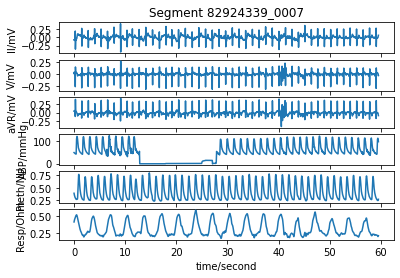

In [16]:
title_text = f"Segment {rel_segment_name}"
wfdb.plot_wfdb(record=segment_data,
               title=title_text,
               time_units='seconds') 

- Extract the PPG signal to loook at it more closely

In [19]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Extracted the PPG signal from column 4 of the matrix of waveform data.


<div class="alert alert-block alert-warning"><p><b>Note:</b> the name given to PPG signals in the database is 'Pleth'.</p></div>

- Plot to look at the shape of the PPG pulse wave more closely

(50.0, 55.0)

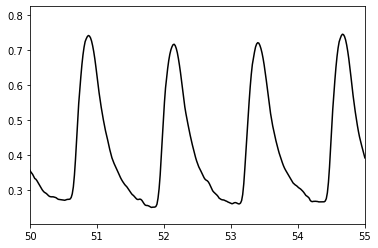

In [20]:
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, (len(ppg) / fs), 1.0 / fs)
plt.plot(t, ppg, color = 'black', label='PPG')
plt.xlim([50, 55])

---
## Compare this to pulse waves from the literature

- Compare the pulse waves above to the different shapes of pulse waves shown here:

![PPG pulse waves](https://upload.wikimedia.org/wikipedia/commons/e/ed/Classes_of_photoplethysmogram_%28PPG%29_pulse_wave_shape.svg)

Source: _Charlton PH et al., 'Assessing hemodynamics from the photoplethysmogram to gain insights into vascular age: a review from VascAgeNet', https://doi.org/10.1152/ajpheart.00392.2021 (CC BY 4.0)_

These pulse waves are the typical shapes for young (class 1) to old (class 4) subjects.

<div class="alert alert-block alert-info"><p><b>Question:</b> How do these pulse waves compare to those extracted from the MIMIC Database? Which is most similar?</p></div>